In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.impute import SimpleImputer
import matplotlib 
import graphviz
from sklearn.feature_selection import VarianceThreshold
# correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [173]:
df = pd.read_csv('J:/Atieh/University/data mining/homeworks/HW2/code/q7/heart.csv')
label = df.target
df_t = df.drop('target', axis=1)

fn, ft, ln, lt = train_test_split(df_t, label, test_size = 0.2)



In [174]:
features_train = fn
features_test = ft
label_train = ln
label_test = lt
# if train data contains NaN or nor
features_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [175]:
features_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3


In [176]:
# classify columns as Catergorical or Continuous

categorical_var = []
continuous_var = []

for column in df.columns:
    if len(df[column].unique()) <= 10:
        print(f"{column} : {df[column].unique()}")
        categorical_var.append(column)
        print()
    else:
        continuous_var.append(column)
        
print("Categorical Variables are: ", categorical_var)
print("Continuous Variables are: ", continuous_var)

sex : [1 0]

cp : [3 2 1 0]

fbs : [1 0]

restecg : [0 1 2]

exang : [0 1]

slope : [0 2 1]

ca : [0 2 1 3 4]

thal : [1 2 3 0]

target : [1 0]

Categorical Variables are:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables are:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


(14.5, -0.5)

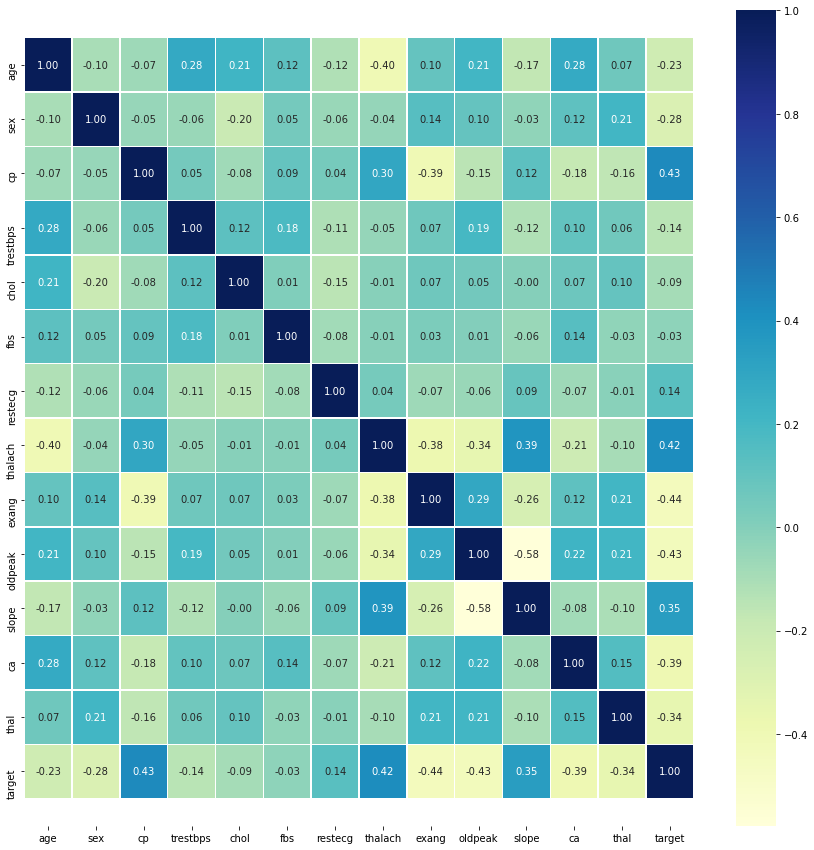

In [177]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

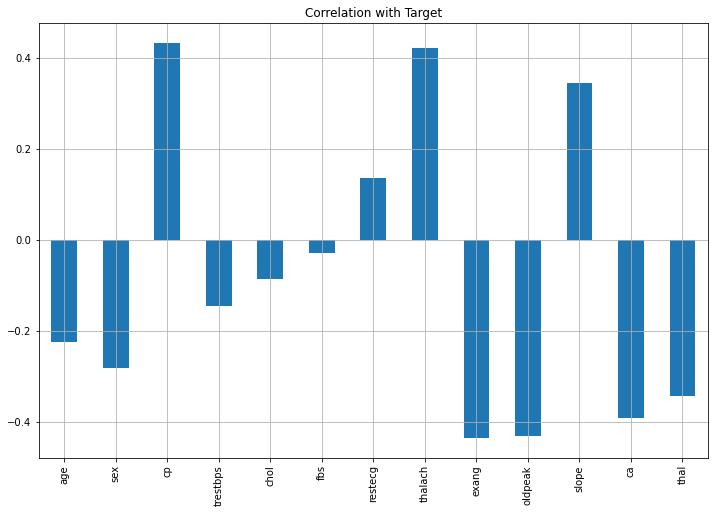

In [179]:
df.drop('target', axis=1).corrwith(df.target).plot(kind = 'bar', grid = True, 
                                                   figsize = (12, 8), 
                                                   title = "Correlation with Target")


In [180]:
# for scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train = pd.DataFrame(sc.fit_transform(features_train), columns= features_train.columns)
features_test = pd.DataFrame(sc.transform(features_test), columns= features_train.columns)

In [183]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance', p=1)
knn.fit(features_train, label_train)
label_pred = knn.predict(features_test)
accuracy = metrics.accuracy_score(label_test, label_pred)
accuracy

0.819672131147541

In [184]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(features_train, label_train)
label_pred2 = gnb.predict(features_test)
accuracy2 = metrics.accuracy_score(label_test, label_pred2)
accuracy2

0.819672131147541